In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [49]:
data = np.genfromtxt('exoplaneteu_catalog.csv', skip_header=0, names=True, dtype=None, delimiter=',', skip_footer=0, unpack=True);

In [125]:
print max(data['discovered']) - min(data['discovered'])

29


In [51]:
data.dtype.names

('name',
 'mass',
 'mass_error_min',
 'mass_error_max',
 'mass_sini',
 'mass_sini_error_min',
 'mass_sini_error_max',
 'radius',
 'radius_error_min',
 'radius_error_max',
 'orbital_period',
 'orbital_period_error_min',
 'orbital_period_error_max',
 'semi_major_axis',
 'semi_major_axis_error_min',
 'semi_major_axis_error_max',
 'eccentricity',
 'eccentricity_error_min',
 'eccentricity_error_max',
 'inclination',
 'inclination_error_min',
 'inclination_error_max',
 'angular_distance',
 'discovered',
 'f0',
 'omega',
 'omega_error_min',
 'omega_error_max',
 'tperi',
 'tperi_error_min',
 'tperi_error_max',
 'tconj',
 'tconj_error_min',
 'tconj_error_max',
 'tzero_tr',
 'tzero_tr_error_min',
 'tzero_tr_error_max',
 'tzero_tr_sec',
 'tzero_tr_sec_error_min',
 'tzero_tr_sec_error_max',
 'lambda_angle',
 'lambda_angle_error_min',
 'lambda_angle_error_max',
 'impact_parameter',
 'impact_parameter_error_min',
 'impact_parameter_error_max',
 'tzero_vr',
 'tzero_vr_error_min',
 'tzero_vr_error_max

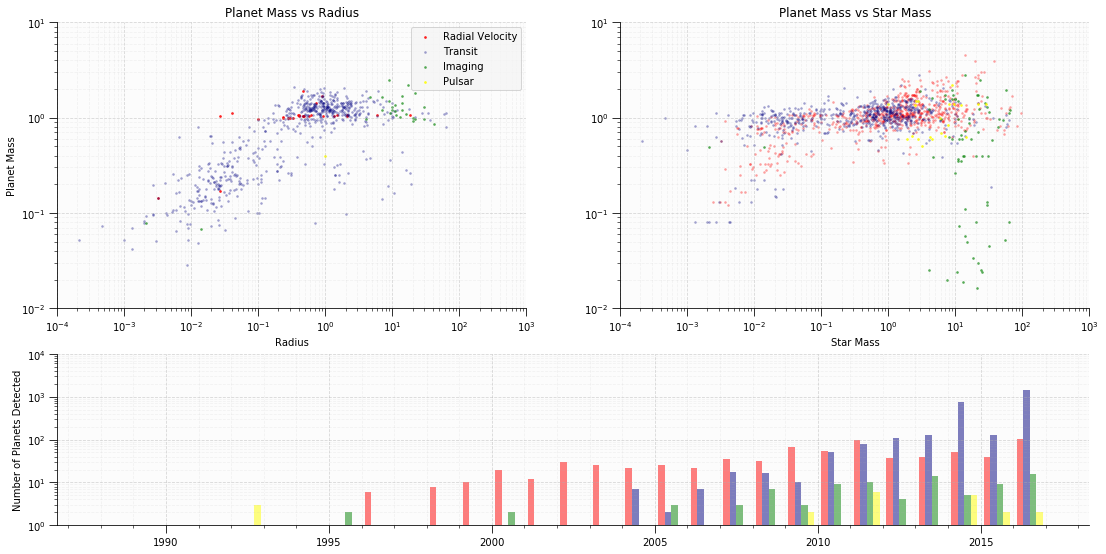

In [166]:
height_ratios = [5, 3]
width_ratios = [9, 9]
wspace = .5
hspace = 1.25
markersize = 3
fig = plt.figure(figsize=(sum(width_ratios) + wspace *
                          (len(width_ratios) - 1),
                          sum(height_ratios) + hspace *
                          (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios),
                       len(width_ratios),
                       height_ratios=height_ratios,
                       width_ratios=width_ratios)

def beautification():
    ax.set_facecolor('whitesmoke')
    ax.patch.set_alpha(.25)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.minorticks_on()
    plt.tick_params('both', length=8, which='major')
    plt.tick_params('both',length=3, which='minor')
    plt.grid(True, which='major', ls='dashed', alpha=.5)
    plt.grid(True, which='minor', ls='dashed', alpha=.15)
    

fig.suptitle('', fontsize=20)
ax = fig.add_subplot(gs[0,0])
ax.scatter(data['mass'][data['detection_type']=='Radial Velocity'],
           data['radius'][data['detection_type']=='Radial Velocity'],
           c='red',marker='o', alpha='.75', s = markersize, label='Radial Velocity')
ax.scatter(data['mass'][data['detection_type']=='Primary Transit'],
           data['radius'][data['detection_type']=='Primary Transit'],
           c='navy',marker='o',alpha='.25', s = markersize, label='Transit')
ax.scatter(data['mass'][data['detection_type']=='Imaging'],
           data['radius'][data['detection_type']=='Imaging'],
           c='green',marker='o',alpha='.5', s = markersize, label='Imaging')
ax.scatter(data['mass'][data['detection_type']=='Pulsar'],
           data['radius'][data['detection_type']=='Pulsar'],
           c='yellow',marker='o',alpha='.75', s = markersize, label='Pulsar')
beautification()
plt.legend(loc='best')
ax.set_xlim(1e-4,1e3)
ax.set_ylim(1e-2,1e1)
ax.update({'title': 'Planet Mass vs Radius',
           'xlabel': 'Radius', 'ylabel': 'Planet Mass',
           'xscale': 'log', 'yscale': 'log'})

ax = fig.add_subplot(gs[0,1])
ax.scatter(data['mass'][data['detection_type']=='Radial Velocity'],
           data['star_mass'][data['detection_type']=='Radial Velocity'],
           c='red',marker='o', alpha='.25', s = markersize, label='Radial Velocity')
ax.scatter(data['mass'][data['detection_type']=='Primary Transit'],
           data['star_mass'][data['detection_type']=='Primary Transit'],
           c='navy',marker='o',alpha='.25', s = markersize, label='Transit')
ax.scatter(data['mass'][data['detection_type']=='Imaging'],
           data['star_mass'][data['detection_type']=='Imaging'],
           c='green',marker='o',alpha='.5', s = markersize, label='Imaging')
ax.scatter(data['mass'][data['detection_type']=='Pulsar'],
           data['star_mass'][data['detection_type']=='Pulsar'],
           c='yellow',marker='o',alpha='.75', s = markersize, label='Pulsar')
beautification()
ax.set_xlim(1e-4,1e3)
ax.set_ylim(1e-2,1e1)
ax.update({'title': 'Planet Mass vs Star Mass',
           'xlabel': 'Star Mass', 'ylabel': '',
           'xscale': 'log', 'yscale': 'log'})

ax = fig.add_subplot(gs[1,:])
# histdata = np.vstack([data['discovered'][data['detection_type']=='Radial Velocity'],
#                       data['discovered'][data['detection_type']=='Primary Transit'],
#                       data['discovered'][data['detection_type']=='Imaging'],
#                       data['discovered'][data['detection_type']=='Pulsar']]).T
ax.hist((data['discovered'][data['detection_type']=='Radial Velocity'],
         data['discovered'][data['detection_type']=='Primary Transit'],
         data['discovered'][data['detection_type']=='Imaging'],
         data['discovered'][data['detection_type']=='Pulsar']),
        alpha=.5, color=('red','navy','green','yellow'), bins=29)
ax.update({'title': '',
           'xlabel': '', 'ylabel': 'Number of Planets Detected',
           'yscale': 'log'})
beautification()
ax.set_ylim(0,1e4)

plt.savefig('exoplanetdata.png')
plt.show()

In [35]:
plt.rcParams.keys()

[u'_internal.classic_mode',
 u'agg.path.chunksize',
 u'animation.avconv_args',
 u'animation.avconv_path',
 u'animation.bitrate',
 u'animation.codec',
 u'animation.convert_args',
 u'animation.convert_path',
 u'animation.ffmpeg_args',
 u'animation.ffmpeg_path',
 u'animation.frame_format',
 u'animation.html',
 u'animation.mencoder_args',
 u'animation.mencoder_path',
 u'animation.writer',
 u'axes.autolimit_mode',
 u'axes.axisbelow',
 u'axes.edgecolor',
 u'axes.facecolor',
 u'axes.formatter.limits',
 u'axes.formatter.offset_threshold',
 u'axes.formatter.use_locale',
 u'axes.formatter.use_mathtext',
 u'axes.formatter.useoffset',
 u'axes.grid',
 u'axes.grid.axis',
 u'axes.grid.which',
 u'axes.hold',
 u'axes.labelcolor',
 u'axes.labelpad',
 u'axes.labelsize',
 u'axes.labelweight',
 u'axes.linewidth',
 u'axes.prop_cycle',
 u'axes.spines.bottom',
 u'axes.spines.left',
 u'axes.spines.right',
 u'axes.spines.top',
 u'axes.titlepad',
 u'axes.titlesize',
 u'axes.titleweight',
 u'axes.unicode_minus',
